In [1]:
import warnings
warnings.filterwarnings("ignore")

import nelpy as nel
import pandas as pd
import scipy.ndimage.filters
import os
import sys
import warnings
import numpy as np
import pickle
import random

import copy
import matplotlib.pyplot as plt

In [2]:
jar = nel.load_pkl('final_project_data.nel')

In [3]:
jar

{'metadata': {'source': 'gor01vvp01pin01_processed_speed.nel',
  'session': '16-40-19',
  'data_names': ['pos1d', 'spikes']},
 'pos': <AnalogSignalArray at 0x7faa7b4def50: 1 signals (2 segments)> for a total of 41:50 minutes,
 'spikes': <SpikeTrainArray at 0x7faa7b56bcd0: 117 units (2 segments)> at 32552 Hz from 2006-6-07_16-40-19}

In [4]:
spikes = jar['spikes'].bin(ds=.1)
spikes.data.shape

(117, 25099)

In [5]:
spikes.n_events

array([ 27573,    436,  81908,    563,    419,   3139,    269,   7998,
          603,   5341,   3922,  36055,   2118,   2209,   1667,    219,
        38562,    180,    169,    564,  64219,   3064,   1361,   4210,
          276,   1286,     84,   5961,    240,   1883,     39,    693,
            3,   2617,    765,  20330,   2243,    148,    397,    202,
          932,   6953,   2295,   1302,    139,   5086,    357,    184,
         1048,   2068,     34,  16016,   3209,  86110,   1017,   2862,
         4455,  26662,   7413,  18152,   1020,  19094,  27126,   5016,
         5207,    132,   2296, 100992,    726,   2143,   1345,   3975,
           86,   2996,  70500,    409,   1280,    353,    583,     89,
          336,   1320,   4224,    374,     15,   3060,    141,    483,
          364,   3227,    518,     67,   1231,   1730,   5434,      6,
          947,    258,  60302,  17321,    725,    136,   9796,   1030,
         5032,   1791,  89523,    227,  11488,   2310,   2526,    606,
      

Text(0.5, 1.0, 'Full Data Including Long and Short Track Periods')

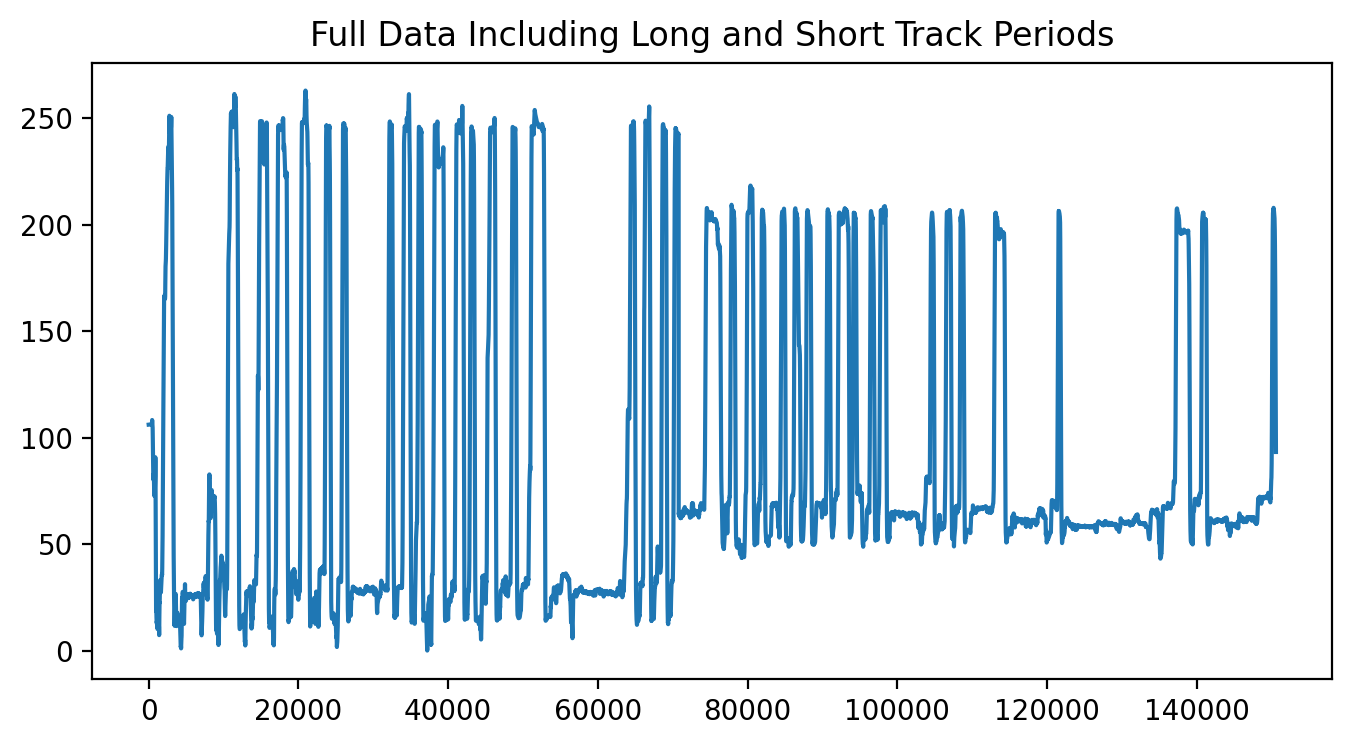

In [7]:
pos = jar['pos']
plt.figure(figsize=(8,4), dpi=200)
plt.plot(pos.data.squeeze())
plt.title('Full Data Including Long and Short Track Periods')

Nelpy epochs in data
 [[   0 1180]
 [1250 2580]]


Text(0.5, 1.0, 'Initial Long Track Segment')

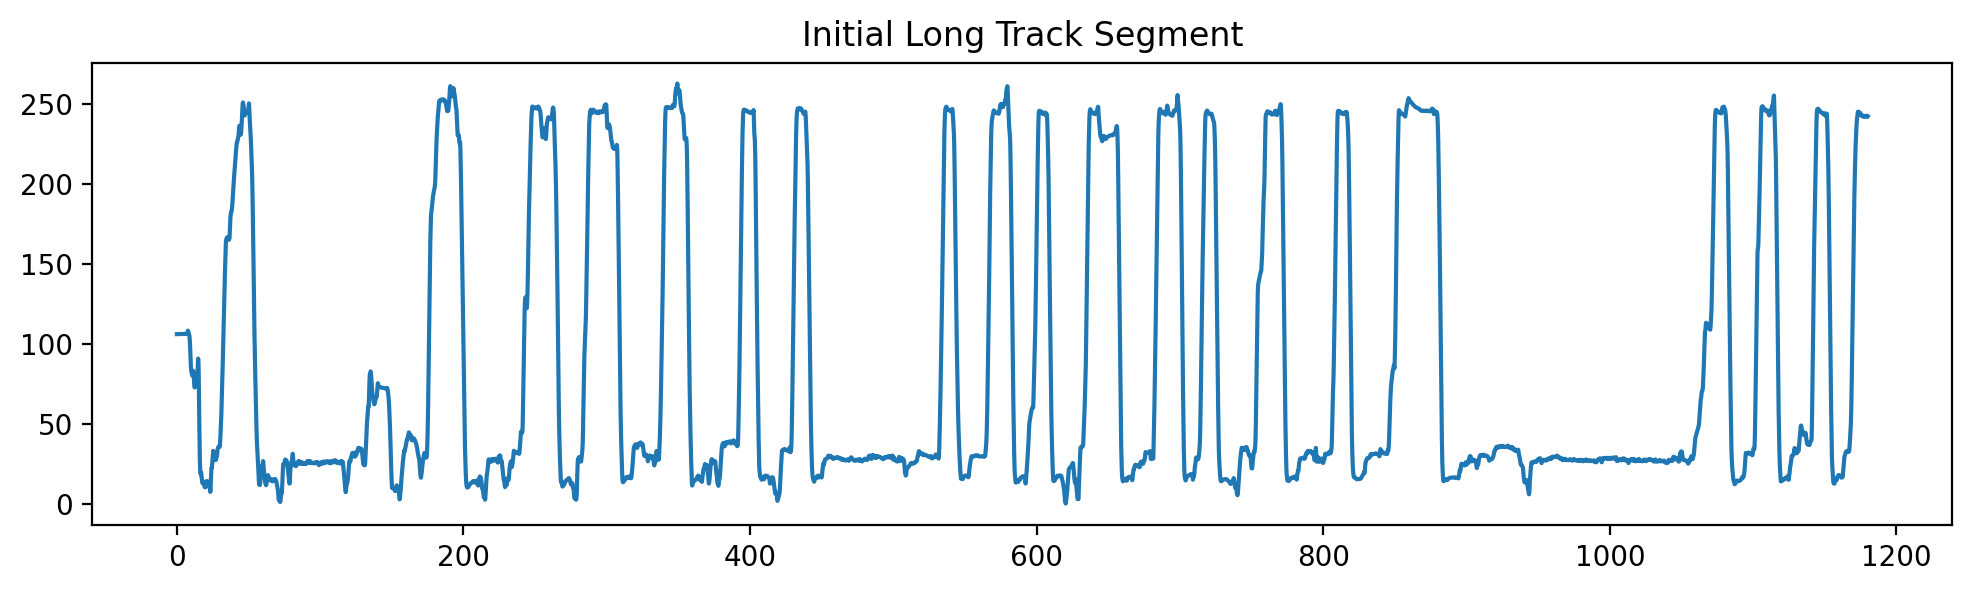

In [8]:
# Get data only for long track portion of experiment
print('Nelpy epochs in data\n', pos.support.time)

long_track_pos = pos[[0],:] # nelpy indexing by first set of data
long_track_spikes = spikes[[0],:]
tvals, vals = long_track_pos.asarray() # Access timestamps and channel data as numpy arrays
fig, ax = plt.subplots(1,1,figsize=(12,3), dpi=200)
ax.plot(tvals, vals)
ax.set_title('Initial Long Track Segment')

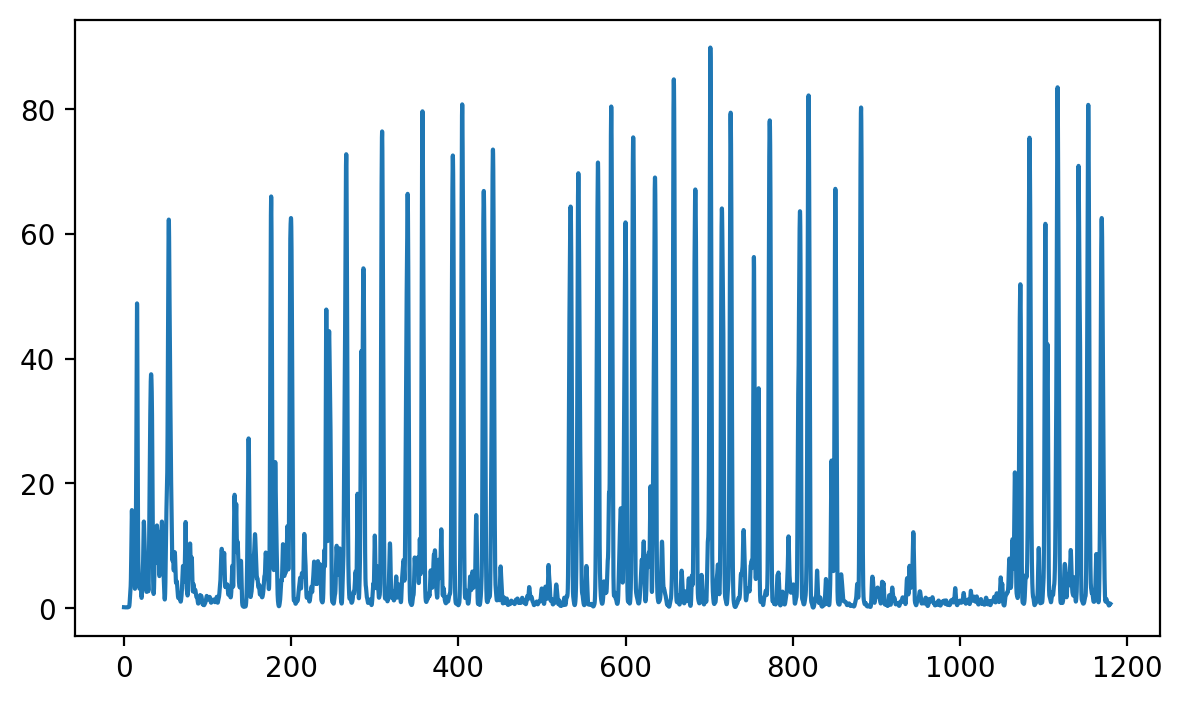

In [9]:
# Can we use speed to find the lap boundaries?

# Calculate the speed by taking the derivative of the position
sigma_500ms = 0.5
speed = nel.utils.ddt_asa(long_track_pos, smooth=True, sigma=sigma_500ms)
tvals, vals = speed.asarray()
plt.figure(figsize=(7,4), dpi=200)
plt.plot(tvals, vals)


In [10]:
# get_run_epochs is a utility function which wraps a speed threshold. This finds periods where the speed
#   is greater than v2 and reaches at least a maximum of v1.
run_epochs = nel.utils.get_run_epochs(speed, v1=35, v2=3) # original choice
print((run_epochs.time.shape[0]))
print(run_epochs.time)

# This looks about right - there seem to be 19.5 full laps, which would be 39 half laps
# and we find 40 epochs.

40
[[   7.76666667   20.33333333]
 [  29.33333333   35.06666667]
 [  49.35         63.9       ]
 [ 166.86666667  183.56666667]
 [ 187.46666667  202.68333333]
 [ 238.53333333  248.46666667]
 [ 261.26666667  269.1       ]
 [ 281.53333333  289.73333333]
 [ 306.26666667  311.75      ]
 [ 332.11666667  341.8       ]
 [ 346.76666667  360.36666667]
 [ 390.45        396.01666667]
 [ 401.71666667  407.58333333]
 [ 427.26666667  433.48333333]
 [ 438.01666667  444.78333333]
 [ 530.88333333  537.        ]
 [ 540.63333333  547.75      ]
 [ 563.68333333  570.01666667]
 [ 577.41666667  585.76666667]
 [ 591.48333333  602.25      ]
 [ 606.2         612.4       ]
 [ 631.71666667  637.93333333]
 [ 654.95        660.48333333]
 [ 678.8         686.35      ]
 [ 697.15        704.31666667]
 [ 712.55        718.71666667]
 [ 722.5         728.78333333]
 [ 748.6         760.75      ]
 [ 769.38333333  775.31666667]
 [ 804.88333333  810.88333333]
 [ 815.76666667  821.61666667]
 [ 844.66666667  853.53333333]
 [ 87